In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('/home/riddhi/advertising.csv') 

In [4]:
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [5]:
print(data.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


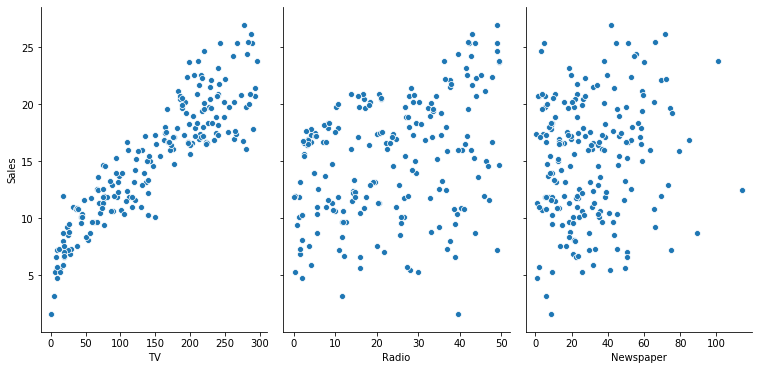

In [6]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)
plt.show()

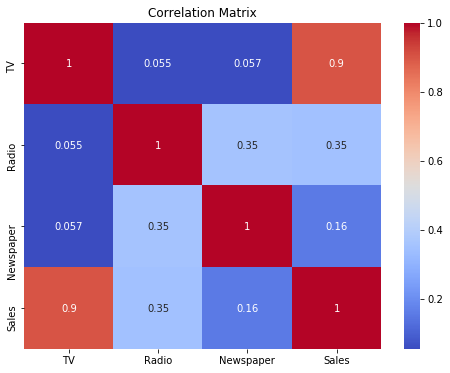

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [8]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-squared (R2 Score):", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 2.907756910271091
Root Mean Squared Error (RMSE): 1.7052146229349228
R-squared (R2 Score): 0.9059011844150826


In [13]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


     Actual  Predicted
95     16.9  17.034772
15     22.4  20.409740
30     21.4  23.723989
158     7.3   9.272785
128    24.7  21.682719


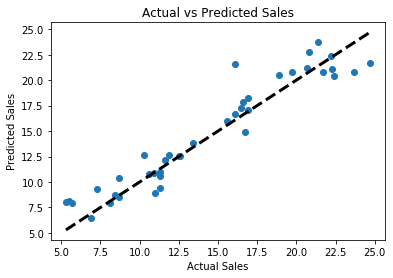

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [15]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337
